In [2]:
import sys
import os

# Assuming the notebook directory is the parent directory of 'load_intan_rhs_format' module
notebook_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'

# Define the path to the directory containing 'load_intan_rhs_format.py'
module_dir = os.path.join(notebook_dir, 'load_intan_rhs_format')

# Add the module directory to sys.path if it's not already there
if module_dir not in sys.path:
    sys.path.append(module_dir)

# Now you can import the read_data function directly from the file
from load_intan_rhs_format import read_data
import numpy as np
import os
import glob

def downsample_data(data, factor):
    """Downsample the data by a given factor."""
    return data[::factor]

def extract_and_downsample_data(filename: str, downsample_factor=60):
    # Downsample from 30000Hz to 500Hz
    rawdata = read_data(filename)
    
    # Print the headers dynamically
    print("Headers in the RHS file:")
    for key, value in rawdata.items():
        print(key)
    
    # Print the keys
    print("\nKeys in the RHS file:", rawdata.keys())
    
    # Print the contents of all the keys
    for key, value in rawdata.items():
        print(f"\nContents of '{key}':")
        print(value)
        print()  # Add a newline for clarity
    
    # Extract amplifier (electrode) data
    amplifier_data = rawdata['amplifier_data']
    num_channels = amplifier_data.shape[0]
    
    # Extract stimulation data
    stim_data = rawdata.get('stim_data', np.zeros((8, amplifier_data.shape[1])))
    
    # Extract time points
    time_points = rawdata.get('t', np.array([]))
    
    # Downsample amplifier data
    amp_downsampled = downsample_data(amplifier_data, downsample_factor)
    
    # Downsample stimulation data
    stim_downsampled = downsample_data(stim_data, downsample_factor)
    
    # Downsample time points
    time_downsampled = downsample_data(time_points, downsample_factor)
    
    return amp_downsampled, stim_downsampled, time_downsampled, num_channels

# Example usage
filename = 'experiment_data/exp_240213_151732.rhs'
amp_data, stim_data, time_points, num_channels = extract_and_downsample_data(filename)

# Extract the file name without extension
base_filename = os.path.splitext(os.path.basename(filename))[0]

# Save the extracted data
savename = os.path.join(notebook_dir, 'experiment_data', f'{base_filename}_all_data.npz')
np.savez_compressed(savename, raw_amp=amp_data, raw_stim=stim_data, timestamps=time_points, num_channels=num_channels)


Reading Intan Technologies RHS Data File, Version 1.0

Found 32 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 483.665 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Data size: 1024, Actual size: 306
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 17.6 seconds
Headers in the RHS file:
stim_parameters
notes
spike_triggers
amplifier_channels
frequency_parameters
reference_channel
board_dac_channels
t
stim_data
compliance_limit_data
charge_recovery_data
amp_settle_data
amplifier_data
board_dac_data

Keys in the RHS file: dict_keys(['stim_parameters', 'notes', 'spike_triggers', 'amplifier_channels', 'frequency_parameters', 'reference_channel', 'board_dac_channels

In [5]:
import sys
import os
from load_intan_rhs_format import read_data
import numpy as np

def downsample_data(data, factor):
    """
    Downsample the data by a given factor along the second dimension.

    Parameters:
    data (np.ndarray): 2D array of data with shape (channels, samples).
    factor (int): The factor by which to downsample the data.

    Returns:
    np.ndarray: The downsampled data.
    """
    # Initialize an empty list to hold the downsampled data for each channel
    downsampled = []
    # Iterate over each channel in the data array
    for channel in data:
        # Downsample the current channel and append to the list
        downsampled.append(channel[::factor])
    # Convert the list of downsampled channels back into a NumPy array
    return np.array(downsampled)

def extract_and_downsample_data(filename: str, downsample_factor=60):
    """
    Extract and downsample amplifier and stimulation data from an RHS file.

    Parameters:
    filename (str): Path to the RHS file.
    downsample_factor (int): The factor by which to downsample the data.

    Returns:
    tuple: Downsampled amplifier data, stimulation data.
    """
    # Load raw data from the RHS file
    rawdata = read_data(filename)
    
    # Extract amplifier (electrode) data, expected to have 32 channels
    amplifier_data = rawdata['amplifier_data']
    
    # Extract stimulation data, ensuring it only reflects the expected 8 channels
    stim_data = rawdata.get('stim_data', np.zeros((8, amplifier_data.shape[1])))
    
    # Check if stim_data accidentally got more channels and correct it
    if stim_data.shape[0] != 8:
        stim_data = stim_data[:8, :]
    
    # Downsample both amplifier and stimulation data
    amp_downsampled = downsample_data(amplifier_data, downsample_factor)
    stim_downsampled = downsample_data(stim_data, downsample_factor)
    
    return amp_downsampled, stim_downsampled

# Define paths and add module directory to sys.path
notebook_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
module_dir = os.path.join(notebook_dir, 'load_intan_rhs_format')
if module_dir not in sys.path:
    sys.path.append(module_dir)

# Process and save the downsampled data
filename = 'experiment_data/exp_240213_151732.rhs'
amp_data, stim_data = extract_and_downsample_data(filename)
base_filename = os.path.splitext(os.path.basename(filename))[0]
savename = os.path.join(notebook_dir, 'experiment_data', f'{base_filename}_all_data.npz')
np.savez_compressed(savename, amp_data=amp_data, stim_data=stim_data)



Reading Intan Technologies RHS Data File, Version 1.0

Found 32 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 483.665 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Data size: 1024, Actual size: 306
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 17.7 seconds


In [6]:
import numpy as np

# File paths
file_paths = [
    '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'
]

# Load and print contents of each file
for file_path in file_paths:
    print("Contents of file:", file_path)
    try:
        data = np.load(file_path)
        print("Keys in the file:", list(data.keys()))
        
        # Iterate through each key to print details about the data
        for key in data.keys():
            # Assuming that the data might be large, only show the shape and dtype of each array
            print(f"\nKey: '{key}'")
            print(f"Shape: {data[key].shape}, Dtype: {data[key].dtype}")
            # If you want to print a small part of the data for a preview (e.g., first 10 elements of each channel)
            if data[key].ndim > 1:  # Check if the data is multi-dimensional
                for i in range(data[key].shape[0]):  # Iterate over the first dimension (channels)
                    print(f"Channel {i+1} sample data: {data[key][i, :10]}...")  # Print first 10 samples
            else:
                print(f"Data sample: {data[key][:10]}...")  # Print first 10 samples for 1D arrays
    except Exception as e:
        print(f"Error loading file: {e}")
    print("\n")


Contents of file: /home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz
Keys in the file: ['amp_data', 'stim_data']

Key: 'amp_data'
Shape: (32, 241833), Dtype: float64
Channel 1 sample data: [  1.365   0.39   -5.655 -11.31   -2.925   6.045   1.365  -0.975  -2.34
   4.095]...
Channel 2 sample data: [ 4.095 -1.755 -0.78   5.85  -3.315 -2.145  2.145 -1.365 -8.385  4.485]...
Channel 3 sample data: [ 1.56   2.34   1.17  -3.705  1.95  -6.24   4.095  0.78  -2.34   3.315]...
Channel 4 sample data: [-7.8   -9.165  3.705 -0.975 11.895  3.315  0.78  -1.95   0.78   0.   ]...
Channel 5 sample data: [-3.705 -6.045 -9.36   0.    -1.56  -2.535 -0.195 10.92  -6.045  8.775]...
Channel 6 sample data: [ 4.095  4.485 -8.775  4.29   1.95  -4.29  -3.12   0.585  0.975 -3.315]...
Channel 7 sample data: [-1.17   0.195 -0.195  3.705 -6.24   1.755  6.24  -8.19   2.535 -7.605]

In [7]:
import numpy as np

# Assuming 'savename' is the path to your npz file
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'

# Load the data
data = np.load(savename)

# Assuming the stimulation data is under the key 'stim_data'
stim_data = data['stim_data']

# Print unique values and counts for each of the 8 channels of stim_data
for i in range(stim_data.shape[0]):
    unique_values, counts = np.unique(stim_data[i], return_counts=True)
    print(f"Channel {i+1}:")
    for value, count in zip(unique_values, counts):
        print(f"  Value: {value}, Count: {count}")
    print()


Channel 1:
  Value: -8.00000009348878, Count: 3
  Value: 0.0, Count: 241826
  Value: 8.00000009348878, Count: 4

Channel 2:
  Value: 0.0, Count: 241833

Channel 3:
  Value: 0.0, Count: 241833

Channel 4:
  Value: 0.0, Count: 241833

Channel 5:
  Value: 0.0, Count: 241833

Channel 6:
  Value: 0.0, Count: 241833

Channel 7:
  Value: 0.0, Count: 241833

Channel 8:
  Value: 0.0, Count: 241833



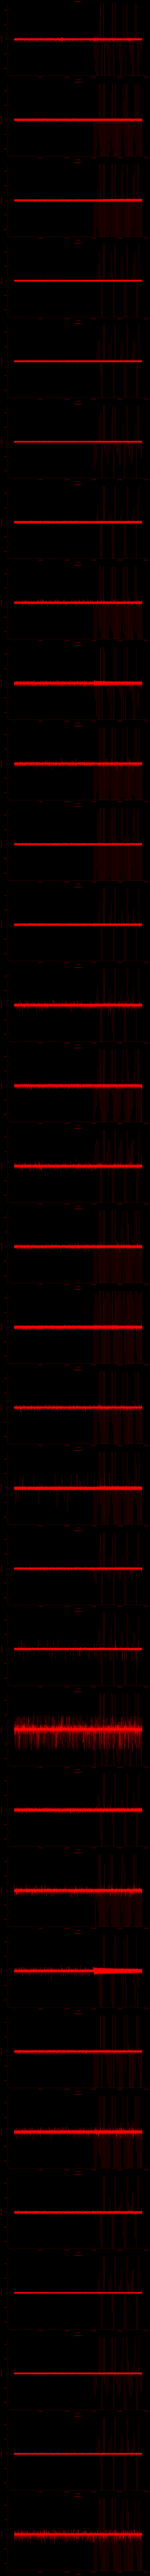

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'
data = np.load(savename)

# Assuming the amplifier data is under the key 'amp_data'
amp_data = data['amp_data']

# Define the number of plots
n_plots = amp_data.shape[0]

# Create a figure to hold the subplots
plt.figure(figsize=(15, 8 * n_plots), facecolor='black')  # Set black background

# Loop through each channel and create a subplot
for i in range(n_plots):
    plt.subplot(n_plots, 1, i+1)
    plt.plot(amp_data[i], color='red', linewidth=0.5)  # Set plotted data to red
    plt.title(f'Channel {i+1}', color='red', fontsize=10)  # Set title color to red
    plt.xlabel('Sample', color='red', alpha=0.7)  # Set x-label color to red with less transparency
    plt.ylabel('Amplitude', color='red', alpha=0.7)  # Set y-label color to red with less transparency
    plt.xticks(color='red', alpha=0.7)  # Set x-ticks color to red with less transparency
    plt.yticks(color='red', alpha=0.7)  # Set y-ticks color to red with less transparency
    plt.gca().spines['bottom'].set_color('red')  # Set x-axis color to red
    plt.gca().spines['left'].set_color('red')  # Set y-axis color to red
    plt.gca().spines['bottom'].set_alpha(0.7)  # Set x-axis transparency to be less transparent
    plt.gca().spines['left'].set_alpha(0.7)  # Set y-axis transparency to be less transparent
    plt.gca().set_facecolor('black')  # Set plot background to black
    plt.ylim(-500, 500)  # Set y-axis limits

plt.tight_layout()
plt.show()